In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:05<00:00, 276MB/s]
100% 1.06G/1.06G [00:05<00:00, 192MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = '/content/dogs_vs_cats/train'
validation_dir = '/content/dogs_vs_cats/test'

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    class_mode = 'binary',
    target_size = (256, 256),
    batch_size = 32,

)

validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,
    class_mode = 'binary',
    target_size = (256, 256),
    batch_size = 32,

)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
model = Sequential()

model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    padding = 'valid',
    activation = 'relu',
    input_shape = (256, 256, 3)
))
model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = 2,
    padding = 'valid'
))


model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    padding = 'valid',
    activation = 'relu',
))
model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = 2,
    padding = 'valid'
))

model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    padding = 'valid',
    activation = 'relu',
))
model.add(BatchNormalization())
model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = 2,
    padding = 'valid'
))

model.add(Flatten())

model.add(Dense(
    units = 64,
    activation = 'relu'
))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,715,681 (14.17 MB)

 Trainable params: 3,715,425 (14.17 MB)

 Non-trainable params: 256 (1.00 KB)

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [11]:
history = model.fit(train_generator, epochs = 25, validation_data = validation_generator)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 331s 508ms/step - accuracy: 0.5320 - loss: 1.2526 - val_accuracy: 0.5386 - val_loss: 0.7423
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 505ms/step - accuracy: 0.5359 - loss: 0.6968 - val_accuracy: 0.6064 - val_loss: 0.6598
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 315s 497ms/step - accuracy: 0.5666 - loss: 0.6726 - val_accuracy: 0.6470 - val_loss: 0.6361
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 326s 505ms/step - accuracy: 0.5663 - loss: 0.6720 - val_accuracy: 0.6410 - val_loss: 0.6399
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 313s 496ms/step - accuracy: 0.5829 - loss: 0.6592 - val_accuracy: 0.6882 - val_loss: 0.6068
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 499ms/step - accuracy: 0.6023 - loss: 0.6472 - val_accuracy: 0.5922 - val_loss: 0.7712
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 315s 500ms/step - accuracy: 0.6108 - loss: 0.6466 - val_accuracy: 0.6976 - val_loss: 0.5966
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 499ms/step - accuracy: 0.6338 - loss: 0.63

In [14]:
model.save('my_model.keras')

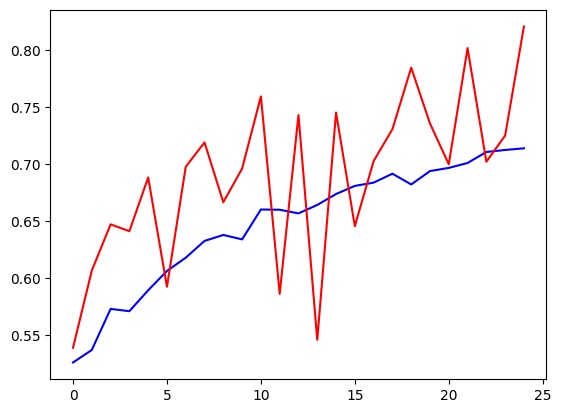

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.show()